# 机器学习作业题目3实验报告
## 题目 3：随机采样 (10 points)

### 任务定义：
>我们学习过通过随机变量x的累积分布函数（cumulative distribution function, CDF） $F_x$ 的逆函数，及一个均匀分布上的随机抽样，完成对随机变量 $x$ 进行间接采样的方法。对于一个 Laplace 随机变量 $x$，假设它的均值为 0，方差为 1，  
其概率密度 $p(x)$ 为：
$\begin{align}
p(x)=\frac{1}{\sqrt{2}}exp(-\sqrt{2}|x|) \quad x \in \mathbb{R}
\end{align}$  
对应的 CDF $F_x$ 为：
$\begin{align}
F_x(\alpha)=\int_{-\infty}^{\alpha}\frac{1}{\sqrt{2}}exp(-\sqrt{2}|u|)du
\end{align}$  
试推导 $Y=F_x(\alpha)$ 的逆函数，通过一个均匀分布的随机抽样，实现对 $x \sim p(x)$ 的抽样，并得到对应的 100 个独立等分布的样本。

### 输入输出：
- 输入：无（已推导出逆函数）
- 输出：Laplace 随机变量（均值为 0，方差为 1）的100个独立等分布的样本。

### 方法描述

**首先，推导 $Y=F_x(\alpha)$ 的逆函数：**
 
CDF：
$\begin{align}
F_x(\alpha)
=\int_{-\infty}^{\alpha}\frac{1}{\sqrt{2}}exp(-\sqrt{2}|u|)du
=\begin{cases}
0.5\exp(\sqrt{2}\alpha) & \mbox{if }x < 0 \\
1-0.5\exp(-\sqrt{2}\alpha) & \mbox{if }x \geq 0
\end{cases}
=0.5+0.5sgn(\alpha)(1-\exp (-\sqrt{2}|\alpha|) )
\end{align})$
 
$\because F(F^{-1}(\alpha))=\alpha$
 
$\therefore F^{-1}(\alpha)=\frac{1}{\sqrt{2}}sgn(\alpha-0.5)\ln(1 - 2|\alpha-0.5|) \quad 0 < \alpha < 1$

In [1]:
# Import numpy as np and matplotlib as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# 推导出的逆函数
def ICDF(x):
    return 1 / np.sqrt(2) * np.sign(x - 0.5) * np.log(1 - 2 * np.fabs(x - 0.5))

In [3]:
# 通过一个均匀分布的随机抽样，实现抽样，并得到对应的1000个独立等分布的样本（100个样本绘制的）
X = np.random.uniform(0, 1, 1000)
sample = ICDF(X)

In [4]:
# 输出：100个独立等分布的样本
print(sample[:100])

[ 1.73320442 -1.52302609  0.1691426   2.88961733 -0.23353637  0.95197449
 -1.70196329  2.44727826 -0.31314782  0.20583222 -2.94896184  0.59665429
  1.27424459 -0.58452024  0.69570966  0.53847371 -0.090802   -0.13917647
 -0.95437784 -0.26290124  1.16094572 -0.28319468 -2.77387474 -0.06385202
 -0.57849006 -0.35397803 -0.14418909  2.40086216  0.42608018 -0.05681842
 -0.54696652  0.74579658 -0.15167848  0.05020778  0.04088282  0.02064771
  0.26300877  0.75926285 -0.09181894  0.52316327 -0.37748419  0.06401569
  0.33614083  0.48204381  0.90356112  1.19221087 -0.46450638  2.13305756
  0.02956008 -0.9571222  -0.03639853  0.41797889 -0.16988657 -0.2822783
 -1.12735187  1.19951459 -1.0472225  -0.01927824 -0.46663969  0.39421325
  0.69581585  0.38366627 -0.80683344 -0.02989277 -0.21673861  0.65900346
  1.50039937  0.98375661 -0.84412107  0.48067038 -0.57347243 -0.06508513
  2.67145759  0.80932986  0.58110237  0.62356149 -1.75761053 -0.01993432
  0.1427651  -0.12888095 -0.21904429 -0.48634183 -0.

### 结果分析（性能评价）

Mean: 0.014865447539362104
Var:1.0245580422701146


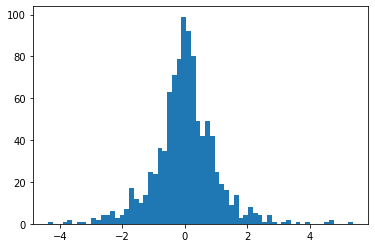

In [5]:
print("Mean: " + str(sample.mean()))
print("Var:" + str(sample.var()))
plt.hist(sample, bins=64)
plt.show()

**结果分析：均值接近0，方差接近1，图像与Laplace分布相似，成功完成任务。**

### 编程和实验的软硬件环境
- 软件环境
    - OS：Windows 10
    - IDE：PyCharm Professional + Jupyter Notebook
    - Python：3.7
- 硬件环境
    - CPU：Intel(R) Core(TM) i7-9750H